**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score

from scipy.spatial.distance import cdist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
#KNN-algorithm uses Minkowsky metric with p = 2, so its dist(X, Y) := sqrt(sum((Xi - Yi) ** 2))
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.num = n_neighbors
        self.alg_type = algorithm
        self.X = np.asarray([])
        self.y = np.asarray([])
    
    def fit(self, X, y):
        if self.alg_type == 'brute':
            self.X = np.array(X)
            self.y = np.array(y)
        elif self.alg_type == 'kd_tree':
            self.X = np.array(X)
            self.y = np.array(y)
    
    def predict(self, X):
        if self.alg_type == 'brute':
            dists = cdist(X, self.X)
            indexes = dists.argpartition(self.num, axis = 1)[:, 0:self.num]
            y_pred = self.y[indexes]
            max_value = y_pred.max()
            x = np.arange(y_pred.shape[0], dtype = int).reshape(-1, 1) * (max_value + 1)
            y_pred += x
            z = np.bincount(y_pred.ravel(), minlength = y_pred.shape[0] * (max_value + 1)).reshape(-1, max_value + 1)
            y_pred -= x
            y_pred = np.unravel_index(z.argmax(axis = 1), z.shape)[1]
            return y_pred
        elif self.alg_type == 'kd_tree':
            tree = KDTree(self.X, leaf_size = 40)
            dist, indexes = tree.query(X, k = self.num)
            y_pred = self.y[indexes]
            max_value = y_pred.max()
            x = np.arange(y_pred.shape[0], dtype = int).reshape(-1, 1) * (max_value + 1)
            y_pred += x
            z = np.bincount(y_pred.ravel(), minlength = y_pred.shape[0] * (max_value + 1)).reshape(-1, max_value + 1)
            y_pred -= x
            y_pred = np.unravel_index(z.argmax(axis = 1), z.shape)[1]
            return y_pred

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 666 µs, sys: 128 µs, total: 794 µs
Wall time: 642 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 26 µs, sys: 0 ns, total: 26 µs
Wall time: 23.4 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 1.33 ms, sys: 148 µs, total: 1.48 ms
Wall time: 1.12 ms


array([0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 2, 2])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 174 µs, sys: 34 µs, total: 208 µs
Wall time: 142 µs


array([0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 2, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 723 µs, sys: 140 µs, total: 863 µs
Wall time: 690 µs


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 29 µs, sys: 6 µs, total: 35 µs
Wall time: 31 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 1.61 ms, sys: 0 ns, total: 1.61 ms
Wall time: 1.32 ms


array([0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 438 µs, sys: 0 ns, total: 438 µs
Wall time: 365 µs


array([0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)
y = target
words = np.array(vectorizer.get_feature_names())

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
clf = KNeighborsClassifier(n_neighbors = 5, algorithm = 'brute')
scores = cross_val_score(clf, X, y, cv=3)

In [23]:
scores

array([0.17815483, 0.18403606, 0.18695306])

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [24]:
x = np.arange(1, 11)
quality = np.zeros(10)
optimal_size = 0
max_res = 0
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors = i, algorithm = 'brute')
    scores = cross_val_score(clf, X, y, cv=3)
    cur_res = scores.mean()
    quality[i - 1] = cur_res
    if max_res < cur_res:
        max_res = cur_res
        optimal_size = i

In [25]:
optimal_size

1

<BarContainer object of 10 artists>

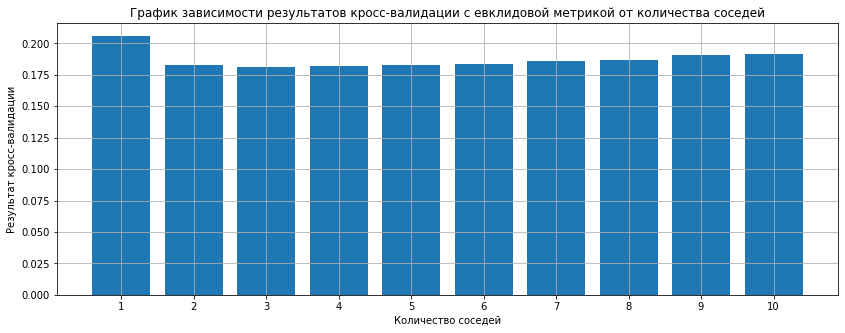

In [26]:
fig = plt.figure(figsize = (14, 5))
a = plt.subplot(111, xticks = range(11))
a.set_xlabel("Количество соседей") 
a.set_ylabel("Результат кросс-валидации")
a.set_title("График зависимости результатов кросс-валидации с евклидовой метрикой от количества соседей")
a.grid()
a.bar(x, quality)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [27]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)
y = target
words = np.array(vectorizer.get_feature_names())

In [28]:
x1 = np.arange(1, 11)
quality1 = np.zeros(10)
optimal_size1 = 0
max_res1 = 0
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors = i, algorithm = 'brute', metric = 'cosine')
    scores = cross_val_score(clf, X, y, cv=3)
    cur_res = scores.mean()
    quality1[i - 1] = cur_res
    if max_res1 < cur_res:
        max_res1 = cur_res
        optimal_size1 = i

In [29]:
optimal_size1

1

<BarContainer object of 10 artists>

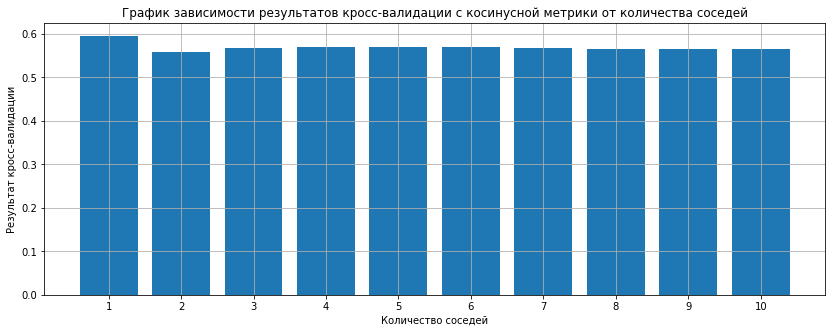

In [30]:
fig1 = plt.figure(figsize = (14, 5))
a1 = plt.subplot(111, xticks = range(11))
a1.set_xlabel("Количество соседей") 
a1.set_ylabel("Результат кросс-валидации")
a1.set_title("График зависимости результатов кросс-валидации с косинусной метрики от количества соседей")
a1.grid()
a1.bar(x1, quality1)

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [31]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [32]:
data = newsgroups['data']
target = newsgroups['target']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)
y = target
words = np.array(vectorizer.get_feature_names())
clf = KNeighborsClassifier(n_neighbors = 1, algorithm = 'brute', metric = 'cosine')
scores = cross_val_score(clf, X, y, cv=3)

In [33]:
scores.mean()

0.5649212522008078